# REPARE INPUT DATA

In [ ]:
import csv

# This was taken from File KDL_Tuan4 hihi
s = """
 1 Wine,Chips,Bread,Butter,Milk,Apple
 2 Wine,Bread,Butter,Milk
 3 Bread,Butter,Milk
 4 Chips,Apple
 5 Wine,Chips,Bread,Butter,Milk,Apple
 6 Wine,Chips,Milk
 7 Wine,Chips,Bread,Butter,Apple
 8 Wine,Chips,Milk
 9 Wine,Bread,Apple
 10 Wine,Bread,Butter,Milk
 11 Chips,Bread,Butter,Apple
 12 Wine,Butter,Milk,Apple
 13 Wine,Chips,Bread,Butter,Milk
 14 Wine,Bread,Milk,Apple
 15 Wine,Bread,Butter,Milk,Apple
 16 Wine,Chips,Bread,Butter,Milk,Apple
 17 Chips,Bread,Butter,Milk,Apple
 18 Chips,Butter,Milk,Apple
 19 Wine,Chips,Bread,Butter,Milk,Apple
 20 Wine,Bread,Butter,Milk,Apple
 21 Wine,Chips,Bread,Milk,Apple
 22 Chips
"""

# strip out the number in the head of each line, and split the string
# into a list of lines
# then split each line into a list of items
s1 = s.strip().split('\n')[1:]
s2 = [x.split(' ')[2] for x in s1]
s2 = [x.split(',') for x in s2]
s2 = [sorted(x, reverse = True) for x in s2]
total = set()
for x in s2:
    total = total.union(x)
total


adict = {'Wine': 0, 'Chips': 1, 'Bread': 2, 'Butter': 3, 'Milk': 4, 'Apple': 5}
table = [[0 for i in range(len(total))] for j in range(len(s2))]

# fill the table with it's transaction item, a real sparse matrix
for i,line in enumerate(s2):
    for item in line:
        table[i][adict[item]] = item

# fill the value with 0 by NaN
for i in range(len(table)):
    for j in range(len(table[i])):
        if table[i][j] == 0:
            table[i][j] = 'NaN'

print(table)
# write the table to a csv file
filename = "data.csv"
header = ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple']
with open(filename, "w") as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for line in table:
        writer.writerow(line)



{'Wine': 0, 'Chips': 1, 'Bread': 2, 'Butter': 3, 'Milk': 4, 'Apple': 5}


# LOAD DATASET AND LIBRARY

In [32]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/4c/43/2fc7f76c8891aef148901f1ba3dee65c1cbac00a85ae5ee0dabc2b861256/mlxtend-0.23.4-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [99]:
import os
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

cur_cwd = os.getcwd()

filepath = os.path.join(cur_cwd, "data.csv")

df = pd.read_csv(filepath, header = None)
df

,0,1,2,3,4,5
0,Wine,Chips,Bread,Butter,Milk,Apple
1,Wine,NaN,Bread,Butter,Milk,NaN
2,NaN,NaN,Bread,Butter,Milk,NaN
3,NaN,Chips,NaN,NaN,NaN,Apple
4,Wine,Chips,Bread,Butter,Milk,Apple
5,Wine,Chips,NaN,NaN,Milk,NaN
6,Wine,Chips,Bread,Butter,NaN,Apple
7,Wine,Chips,NaN,NaN,Milk,NaN
8,Wine,NaN,Bread,NaN,NaN,Apple
9,Wine,NaN,Bread,Butter,Milk,NaN


In [100]:
df.fillna('NaN', inplace=True)
df = df.astype(str)
records = []

# for i in range(0, df.shape[0]):
#     records.append([str(df.values[i, j]) for j in range(0, df.shape[1])])

records = df.values.tolist()
records

[['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'NaN', 'Bread', 'Butter', 'Milk', 'NaN'],
 ['NaN', 'NaN', 'Bread', 'Butter', 'Milk', 'NaN'],
 ['NaN', 'Chips', 'NaN', 'NaN', 'NaN', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'NaN', 'NaN', 'Milk', 'NaN'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'NaN', 'Apple'],
 ['Wine', 'Chips', 'NaN', 'NaN', 'Milk', 'NaN'],
 ['Wine', 'NaN', 'Bread', 'NaN', 'NaN', 'Apple'],
 ['Wine', 'NaN', 'Bread', 'Butter', 'Milk', 'NaN'],
 ['NaN', 'Chips', 'Bread', 'Butter', 'NaN', 'Apple'],
 ['Wine', 'NaN', 'NaN', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'NaN'],
 ['Wine', 'NaN', 'Bread', 'NaN', 'Milk', 'Apple'],
 ['Wine', 'NaN', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['NaN', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['NaN', 'Chips', 'NaN', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple

<h3>Transform df into transaction type (one hot encoding)</h3> 

In [101]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Bread,Butter,Chips,Milk,NaN,Wine
0,True,True,True,True,True,False,True
1,False,True,True,False,True,True,True
2,False,True,True,False,True,True,False
3,True,False,False,True,False,True,False
4,True,True,True,True,True,False,True
5,False,False,False,True,True,True,True
6,True,True,True,True,False,True,True
7,False,False,False,True,True,True,True
8,True,True,False,False,False,True,True
9,False,True,True,False,True,True,True


In [102]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.681818,(Apple)
1,0.727273,(Bread)
2,0.681818,(Butter)
3,0.636364,(Chips)
4,0.772727,(Milk)
5,0.818182,(NaN)
6,0.727273,(Wine)
7,0.636364,"(Milk, Wine)"


In [103]:
rules = association_rules(frequent_itemsets, 
                          metric="support", 
                          min_threshold=0.1, 
                          support_only = True)

rules = rules[['antecedents', 'consequents', 'support']]
rules

,antecedents,consequents,support
0,(Milk),(Wine),0.636364
1,(Wine),(Milk),0.636364


<h3>Compare with hand-made function </h3>

In [114]:
from itertools import combinations
from collections import defaultdict

def apriori(Transaction, min_support, min_confidence):
    """
    Apriori algorithm for frequent itemset generation and association rules.

    Parameters:
    Transaction : list of list
        List of transactions (each transaction is a list of items).
    min_support : float
        Minimum support threshold (0–1).
    min_confidence : float
        Minimum confidence threshold (0–1).

    Returns:
    frequent_itemsets : list of lists
        Frequent itemsets grouped by length.
    rules : list of tuples
        Association rules in the form (antecedent, consequent, support, confidence)
    """

    # Count total transactions
    num_transactions = len(Transaction)
    items = set(item for transaction in Transaction for item in transaction)
    support_count = defaultdict(int)
    frequent_itemsets = []

    # 1-itemsets
    F1 = []
    for item in items:
        for transaction in Transaction:
            if item in transaction:
                support_count[(item,)] += 1
        if support_count[(item,)] / num_transactions >= min_support:
            F1.append([item])
    frequent_itemsets.append(F1)

    # k-itemsets
    k = 2
    while True:
        prev_frequent = frequent_itemsets[k - 2]
        candidates = []

        for i in range(len(prev_frequent)):
            for j in range(i + 1, len(prev_frequent)):
                candidate = sorted(list(set(prev_frequent[i]) | set(prev_frequent[j])))
                if len(candidate) == k and candidate not in candidates:
                    candidates.append(candidate)

        current_frequent = []
        for transaction in Transaction:
            t_set = set(transaction)
            for itemset in candidates:
                itemset_tuple = tuple(itemset)
                if set(itemset).issubset(t_set):
                    support_count[itemset_tuple] += 1

        for itemset in candidates:
            itemset_tuple = tuple(itemset)
            support = support_count[itemset_tuple] / num_transactions
            
            if support >= min_support:
                current_frequent.append(itemset)

        if not current_frequent:
            break

        frequent_itemsets.append(current_frequent)
        k += 1

    # Generate association rules
    rules = []
    for k_itemsets in frequent_itemsets[1:]:  # skip 1-itemsets
        for itemset in k_itemsets:
            itemset_tuple = tuple(itemset)
            itemset_support = support_count[itemset_tuple] / num_transactions

            # Generate all non-empty proper subsets (antecedents)
            for i in range(1, len(itemset)):
                for antecedent in combinations(itemset, i):
                    consequent = tuple(sorted(set(itemset) - set(antecedent)))
                    antecedent = tuple(sorted(antecedent))

                    if support_count[antecedent] > 0:
                        confidence = support_count[itemset_tuple] / support_count[antecedent]
                        if confidence >= min_confidence:
                            rules.append((antecedent, consequent, itemset_support, confidence))

    return frequent_itemsets, support_count, rules


In [106]:
cur_cwd = os.getcwd()

filepath = os.path.join(cur_cwd, "data.csv")

df = pd.read_csv(filepath, header = None)
df

,0,1,2,3,4,5
0,Wine,Chips,Bread,Butter,Milk,Apple
1,Wine,NaN,Bread,Butter,Milk,NaN
2,NaN,NaN,Bread,Butter,Milk,NaN
3,NaN,Chips,NaN,NaN,NaN,Apple
4,Wine,Chips,Bread,Butter,Milk,Apple
5,Wine,Chips,NaN,NaN,Milk,NaN
6,Wine,Chips,Bread,Butter,NaN,Apple
7,Wine,Chips,NaN,NaN,Milk,NaN
8,Wine,NaN,Bread,NaN,NaN,Apple
9,Wine,NaN,Bread,Butter,Milk,NaN


In [110]:
df.fillna('NaN', inplace=True)
df = df.astype(str)
records = []

# for i in range(0, df.shape[0]):
#     records.append([str(df.values[i, j]) for j in range(0, df.shape[1])])

records = df.values.tolist()
records = [[item for item  in record if item != 'NaN'] for record in records]
records

[['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Bread', 'Butter', 'Milk'],
 ['Bread', 'Butter', 'Milk'],
 ['Chips', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Milk'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Apple'],
 ['Wine', 'Chips', 'Milk'],
 ['Wine', 'Bread', 'Apple'],
 ['Wine', 'Bread', 'Butter', 'Milk'],
 ['Chips', 'Bread', 'Butter', 'Apple'],
 ['Wine', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk'],
 ['Wine', 'Bread', 'Milk', 'Apple'],
 ['Wine', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Chips', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Milk', 'Apple'],
 ['Chips']]

In [ ]:
frequent_sets, support_count, rules = apriori(records, min_support=0.6, min_confidence=0.7)

data = []
for frequent_set in frequent_sets:
    for item_set in frequent_set:
        data.append([frozenset(item_set), support_count[tuple(item_set)] / len(records)])

result = pd.DataFrame(data, columns=['itemsets', 'support'])

# Convert frozenset to sorted string in both DataFrames
result['itemsets'] = result['itemsets'].apply(lambda x: ', '.join(sorted(x)))
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(sorted(x)))

# Sort them for better alignment
result = result.sort_values(by='itemsets').reset_index(drop=True)
frequent_itemsets = frequent_itemsets.sort_values(by='itemsets').reset_index(drop=True)




In [193]:
frequent_itemsets

,support,itemsets
0,0.681818,(Apple)
1,0.727273,(Bread)
2,0.681818,(Butter)
3,0.636364,(Chips)
4,0.772727,(Milk)
5,0.818182,(NaN)
6,0.727273,(Wine)
7,0.636364,"(Milk, Wine)"


/tmp/ipykernel_4788/1448204165.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_4788/1448204165.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


<Figure size 1500x1500 with 0 Axes>

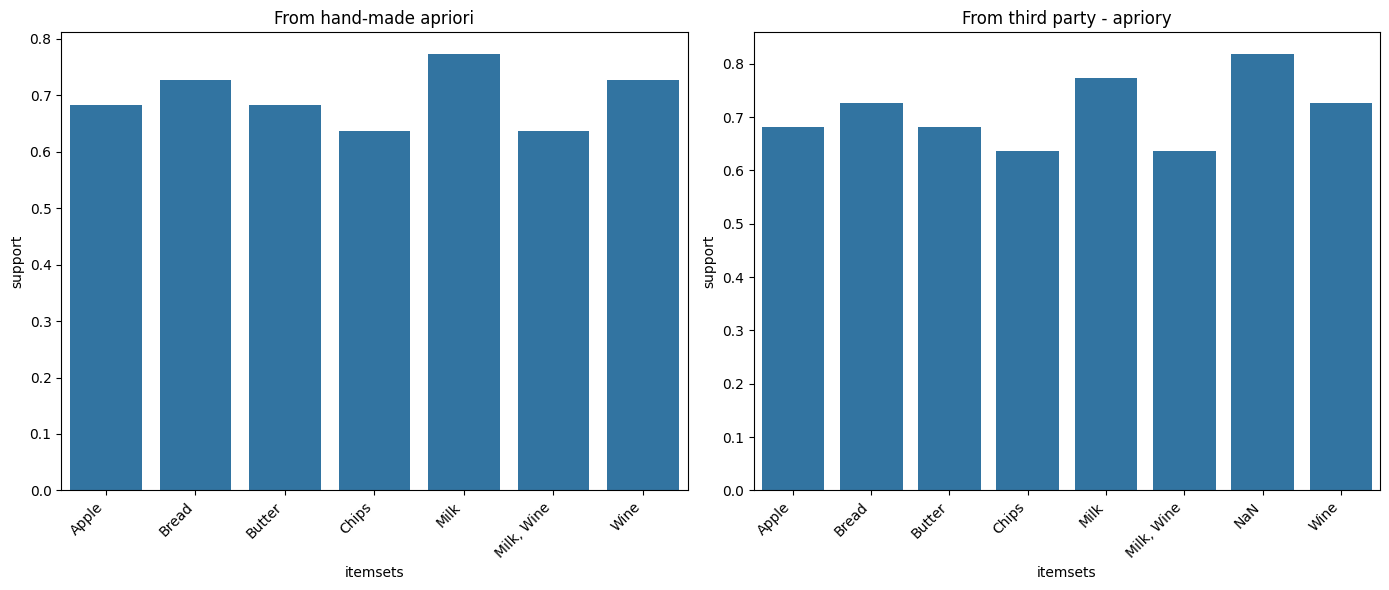

In [201]:
# Step 3: Plot with rotated x-tick labels
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

fig, axis = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=result, x='itemsets', y='support', ax=axis[0])
axis[0].set_title("From hand-made apriori")

sns.barplot(data=frequent_itemsets, x='itemsets', y='support', ax=axis[1])
axis[1].set_title("From third party - apriory")

# Rotate x-axis labels
for ax in axis:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()